<a href="https://colab.research.google.com/github/Niguzmang/AlgorithmsUN2021II/blob/main/lab2/niguzmang_ScottsSanderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [3]:
pip install -U fortran-magic

In [4]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [5]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [6]:
assert ran_the_first_cell, "Oh noes!"

In [7]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
print(l)
print()
#MY EXAMPLE#######
m = ['Bit', False, int(1.0),2.4, 7]
print(m)

[1, 'two', 3.0, 4, 5.0, 'six']

['Bit', False, 1, 2.4, 7]


In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)
print()
#MY EXAMPLE#######
third = m[2]
fourth = m[3]
print("third:", third)
print("fourth:", fourth)

first: 1
second: two

third: 1
fourth: 2.4


In [9]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)
print()
#MY EXAMPLE#######
firstone = m[-5]
secondone = m[-4]
print("first:", firstone)
print("second:", secondone)

last: six
second to last: 5.0

first: Bit
second: False


In [10]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
print(sublist)
print()
#MY EXAMPLE#######
sublist2 = m[2:3]
print(sublist2)

['two', 3.0]

[1]


In [11]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
print(first_three)
print()
#MY EXAMPLE#######
first_four = m[:4]
print(first_four)

[1, 'two', 3.0]

['Bit', False, 1, 2.4]


In [12]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
print(after_three)
print()
#MY EXAMPLE#######
after_four = m[3:]
print(after_four)

[4, 5.0, 'six']

[2.4, 7]


In [13]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
print(l[1:7:2])
print()
#MY EXAMPLE#######
m= [4,8,10,12,14]
print(m[0:5:3])

['b', 'd', 'f']

[4, 12]


In [14]:
# This is a cute way to reverse a list.
print(l[::-1])
print()
#MY EXAMPLE#######
print(m[::-1])

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

[14, 12, 10, 8, 4]


In [15]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)
print()
#MY EXAMPLE#######
print("Before:", m)
m.append(True)
print("After:", m)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']

Before: [4, 8, 10, 12, 14]
After: [4, 8, 10, 12, 14, True]


In [16]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
print([x * 2 for x in l])
print()
#MY EXAMPLE#######
print([x ** 3 for x in l])

[2, 4, 6, 8, 10]

[1, 8, 27, 64, 125]


## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [17]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
print(philosophers)
print()
#MY EXAMPLE#######
dicci = {True: False, 4: 'FaceBook', 1.9: [3,5,"Liubliana"]}
print(dicci)

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

{True: False, 4: 'FaceBook', 1.9: [3, 5, 'Liubliana']}


In [18]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
print(philosophers)
print()
#MY EXAMPLE#######
dicci['Sana'] = 'Yemen'
print(dicci)

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

{True: False, 4: 'FaceBook', 1.9: [3, 5, 'Liubliana'], 'Sana': 'Yemen'}


In [19]:
del philosophers['David']
print(philosophers)
print()
#MY EXAMPLE#######
del dicci[True]
print(dicci)

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

{4: 'FaceBook', 1.9: [3, 5, 'Liubliana'], 'Sana': 'Yemen'}


In [20]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [21]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

print()
#MY EXAMPLE#######
c= [[3,4],
    [2, 5]]
d = [[1,8],
     [9,0]]

In [22]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [23]:
%%time

matmul(a, b)



CPU times: user 32 µs, sys: 7 µs, total: 39 µs
Wall time: 43.4 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [24]:
#MY EXAMPLE#######
%%time

matmul(c, d)

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 16.7 µs


[[39, 24], [47, 16]]

In [25]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
print(randm)

print()
#MY EXAMPLE#######
randm2 = random_matrix(1, 1)
print(randm2)


[[0.7743737386221756, 0.4169320077454022, 0.040834886453875896], [0.31002926131637665, 0.005101123153317899, 0.1012056764640914]]

[[0.14063912691879443]]


In [26]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.8 s, sys: 44.9 ms, total: 10.9 s
Wall time: 10.9 s


In [27]:
#MY EXAMPLE#######
%%time
alea = random_matrix(600, 200)
aleat = random_matrix(200, 500)
y = matmul(alea, aleat)

CPU times: user 19.1 s, sys: 48.6 ms, total: 19.2 s
Wall time: 19.2 s


In [28]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [29]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [30]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [31]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.9 ms, sys: 1 ms, total: 11.9 ms
Wall time: 12.8 ms


333328333350000.0

In [32]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 191 µs, sys: 0 ns, total: 191 µs
Wall time: 201 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [33]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [34]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [35]:
import numpy as np

data = np.array([1, 2, 3, 4])
print(data)

print()
#MY EXAMPLE ####
datos = np.array([5, 6, 7, 8])
print(datos)

[1 2 3 4]

[5 6 7 8]


In [36]:
print(data + data)
print()
#MY EXAMPLE ####
print(datos +datos)

[2 4 6 8]

[10 12 14 16]


In [37]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.03 ms, sys: 1 ms, total: 2.03 ms
Wall time: 3.61 ms


333328333350000.0

In [38]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.61 ms, sys: 3.96 ms, total: 6.57 ms
Wall time: 4.65 ms


333328333350000.0

In [39]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 190 µs, sys: 5 µs, total: 195 µs
Wall time: 203 µs


333328333350000.0

In [40]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [41]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [42]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [43]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

print()
#MY EXAMPLE ####
arr2 = np.array([4, 32, 3., 4.32, -5, 42], dtype='int16').reshape(2, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'

Array:
[[ 4 32  3]
 [ 4 -5 42]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x04\x00 \x00\x03\x00\x04\x00\xfb\xff*\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [44]:
data = np.arange(15).reshape(3, 5)
print(data)
print()
#MY EXAMPLE ####
my_data = np.arange(12).reshape(4, 3)
print(my_data)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [45]:
# Binary operators.
print(data * data)

print()
#MY EXAMPLE ####

print(my_data * my_data)

[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]]

[[  0   1   4]
 [  9  16  25]
 [ 36  49  64]
 [ 81 100 121]]


In [46]:
# Unary functions.
print(np.sqrt(data))

print()
#MY EXAMPLE ####
print(np.sqrt(my_data))

[[0.         1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712 3.        ]
 [3.16227766 3.31662479 3.46410162 3.60555128 3.74165739]]

[[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]
 [2.44948974 2.64575131 2.82842712]
 [3.         3.16227766 3.31662479]]


In [47]:
# Comparison operations
print((data % 3) == 0)

print()
#MY EXAMPLE ####

print((my_data % 2) == 0)

[[ True False False  True False]
 [False  True False False  True]
 [False False  True False False]]

[[ True False  True]
 [False  True False]
 [ True False  True]
 [False  True False]]


In [48]:
# Boolean combinators.
print(((data % 2) == 0) & ((data % 3) == 0))

print()
#MY EXAMPLE ####

print(((my_data % 3) == 1) & ((my_data % 5) == 3))

[[ True False False False False]
 [False  True False False False]
 [False False  True False False]]

[[False False False]
 [False False False]
 [False False False]
 [False False False]]


In [49]:
# as of python 3.5, @ is matrix-multiply
print(data @ data.T)
print()
#MY EXAMPLE ####
print(my_data @ my_data.T)


[[ 30  80 130]
 [ 80 255 430]
 [130 430 730]]

[[  5  14  23  32]
 [ 14  50  86 122]
 [ 23  86 149 212]
 [ 32 122 212 302]]


# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [50]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
print(sines)

print()
#MY EXAMPLE ####
cousines = np.cos(np.linspace(1, 6.1, 12))
print(cousines)

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]

[ 0.54030231  0.10695499 -0.34897433 -0.73122276 -0.95908406 -0.98444861
 -0.80196105 -0.450151   -0.00329807  0.44425121  0.79800326  0.98326844]


In [51]:
# Slicing works with the same semantics as Python lists.
print(sines[0])

print()
#MY EXAMPLE ####

print(cousines[0])

0.0

0.5403023058681398


In [52]:
print(sines[:3])  # First three elements  

print()
#MY EXAMPLE ####

print(cousines[:6])

[0.         0.34185385 0.64251645]

[ 0.54030231  0.10695499 -0.34897433 -0.73122276 -0.95908406 -0.98444861]


In [53]:
sines[5:]  # Elements from 5 on.

print()
#MY EXAMPLE ####

print(cousines[6:])


[-0.80196105 -0.450151   -0.00329807  0.44425121  0.79800326  0.98326844]


In [54]:
print(sines[::2])  # Every other element.

print()
#MY EXAMPLE ####

print(cousines[::1])

[0.         0.64251645 0.98468459 0.8665558  0.34335012]

[ 0.54030231  0.10695499 -0.34897433 -0.73122276 -0.95908406 -0.98444861
 -0.80196105 -0.450151   -0.00329807  0.44425121  0.79800326  0.98326844]


In [55]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

print()
#MY EXAMPLE ####

print("cousines:\n", cousines)
print("cousines > 0.7:\n", cousines > 0.7)
print("cousines[cousines < 0]:\n", cousines[cousines < 0])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]

cousines:
 [ 0.54030231  0.10695499 -0.34897433 -0.73122276 -0.95908406 -0.98444861
 -0.80196105 -0.450151   -0.00329807  0.44425121  0.79800326  0.98326844]
cousines > 0.7:
 [False False False False False False False False False False  True  True]
cousines[cousines < 0]:
 [-0.34897433 -0.73122276 -0.95908406 -0.98444861 -0.80196105 -0.450151
 -0.00329807]


In [56]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
print(sines[[0, 4, 7]])

print()
#MY EXAMPLE ####

print(cousines)
print(cousines[[1, 7, 8,10]])

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
[0.         0.98468459 0.64373604]

[ 0.54030231  0.10695499 -0.34897433 -0.73122276 -0.95908406 -0.98444861
 -0.80196105 -0.450151   -0.00329807  0.44425121  0.79800326  0.98326844]
[ 0.10695499 -0.450151   -0.00329807  0.79800326]


In [57]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

print()
#MY EXAMPLE ####

my_unsorted_data = np.array([41, 23, -2, 0, -1, -5.1, -5.2])

In [58]:
sort_indices = np.argsort(unsorted_data)
print(sort_indices)

print()
#MY EXAMPLE ####

my_sort_indices = np.argsort(my_unsorted_data)
print(my_sort_indices)

[4 0 2 6 1 5 3]

[6 5 2 4 3 1 0]


In [59]:
print(unsorted_data[sort_indices])

print()
#MY EXAMPLE ####

print(my_unsorted_data[my_sort_indices])

[-1  1  2  2  3  5 12]

[-5.2 -5.1 -2.  -1.   0.  23.  41. ]


In [60]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

print()
#MY EXAMPLE ####

market_caps2 = np.array([2, 4, 3, 42, 16]) 
assets2 = np.array(['Z', 'Y', 'X', 'W', 'ð'])

In [61]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
print(assets[sort_by_mcap])

print()
#MY EXAMPLE ####

sort_by_mcap2 = np.argsort(market_caps2)
print(assets2[sort_by_mcap2])

['D' 'B' 'E' 'C' 'A']

['Z' 'X' 'Y' 'ð' 'W']


In [62]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))



Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [63]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

print()
#MY EXAMPLE ####

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']



On multi-dimensional arrays, we can slice along each axis independently.

In [64]:
data = np.arange(25).reshape(5, 5)
print(data)

print()
#MY EXAMPLE ####

MYdata = np.arange(16).reshape(4, 4)
print(MYdata)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [65]:
print(data[:2, :2])  # First two rows and first two columns.

print()
#MY EXAMPLE ####

print(MYdata[:3, :3]) 

[[0 1]
 [5 6]]

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]


In [66]:
print(data[:2, [0, -1]])  # First two rows, first and last columns.

print()
#MY EXAMPLE ####

print(MYdata[:3, [2, -1]]) 

[[0 4]
 [5 9]]

[[ 2  3]
 [ 6  7]
 [10 11]]


In [67]:
print(data[(data[:, 0] % 2) == 0] ) # Rows where the first column is divisible by two.

print()
#MY EXAMPLE ####

print(MYdata[(MYdata[:, 1] % 3) == 0] )

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]]

[[ 8  9 10 11]]


# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [75]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [76]:
print(variance(np.random.standard_normal(1000)))

print()
#MY EXAMPLE ####

print(variance(np.random.standard_normal(2385)))

0.962428308999885

0.9717548619869448


- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [77]:
data = np.arange(30)
print(data.mean())

print()
#MY EXAMPLE ####

datos = np.arange(11)
print(datos.mean())

14.5

5.0


- ...but we can do more interesting things with multi-dimensional arrays.

In [78]:
data = np.arange(30).reshape(3, 10)
print(data)

print()
#MY EXAMPLE ####

datos = np.arange(19).reshape(1, 19)
print(datos)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]]


In [79]:
print(data.mean())

print()
#MY EXAMPLE ####

print(datos.mean())

14.5

9.0


In [80]:
print(data.mean(axis=0))

print()
#MY EXAMPLE ####

print(datos.mean(axis=0))

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


In [81]:
print(data.mean(axis=1))

print()
#MY EXAMPLE ####

print(datos.mean(axis=1))

[ 4.5 14.5 24.5]

[9.]


## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [82]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

print()
#MY EXAMPLE ####

Row = np.array([0, -2, 23])
Column = np.array([[2], [32], [-3]])
print("Row:\n", Row, sep='')
print("Column:\n", Column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]

Row:
[ 0 -2 23]
Column:
[[ 2]
 [32]
 [-3]]


In [83]:
print(row + column)

print()
#MY EXAMPLE ####

print(Row + Column)

[[2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]

[[ 2  0 25]
 [32 30 55]
 [-3 -5 20]]


<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [84]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

print()
#MY EXAMPLE ####

print("Datos:\n", datos, sep='')
print("Mean:\n", datos.mean(axis=1), sep='')
print("Datos - Mean:\n", datos - datos.mean(axis=1), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]

Datos:
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]]
Mean:
[9.]
Datos - Mean:
[[-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
   9.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [85]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
print(s)

print()
#MY EXAMPLE ####

fd = pd.Series(index=[1,2,3], data=[True,'sw',False])
print(fd)


a    1
b    2
c    3
d    4
e    5
dtype: int64

1     True
2       sw
3    False
dtype: object


In [86]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

print()
#MY EXAMPLE ####

print("The indexes are:", fd.index)
print("The values are:", fd.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]

The indexes are: Int64Index([1, 2, 3], dtype='int64')
The values are: [True 'sw' False]


In [87]:
# We can look up values out of a Series by position...
s.iloc[0]

print()
#MY EXAMPLE ####

fd.iloc[2]

False

In [88]:
# ... or by label.
print(s.loc['a'])

print()
#MY EXAMPLE ####

print(s.loc['b'])

1

2


In [89]:
# Slicing works as expected...
print(s.iloc[:2])

print()
#MY EXAMPLE ####

print(fd.iloc[:2])

a    1
b    2
dtype: int64

1    True
2      sw
dtype: object


In [90]:
# ...but it works with labels too!
print(s.loc[:'c'])

print()
#MY EXAMPLE ####

print(fd.loc[:'sw'])

a    1
b    2
c    3
dtype: int64

1     True
2       sw
3    False
dtype: object


In [91]:
# Fancy indexing works the same as in numpy.
print(s.iloc[[0, -1]])

print()
#MY EXAMPLE ####

print(fd.iloc[[0, -1]])

a    1
e    5
dtype: int64

1     True
3    False
dtype: object


In [92]:
# As does boolean masking.
print(s.loc[s > 2])

print()
#MY EXAMPLE ####

print(s.loc[s > 3])

c    3
d    4
e    5
dtype: int64

d    4
e    5
dtype: int64


In [93]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
print(other_s)

print()
#MY EXAMPLE ####

other_list = pd.Series({'d': 30.0, 'z': 40.0, 'a': 10.0, 'c': 20.0})
print(other_list)

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

d    30.0
z    40.0
a    10.0
c    20.0
dtype: float64


In [94]:
print(s + other_s)

print()
#MY EXAMPLE ####

print(other_list + fd)

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

1    NaN
2    NaN
3    NaN
a    NaN
c    NaN
d    NaN
z    NaN
dtype: object


In [95]:
# We can fill in missing values with fillna().
print((s + other_s).fillna(0.0))

print()
#MY EXAMPLE ####

print((fd + other_list).fillna('ex'))

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

1    ex
2    ex
3    ex
a    ex
c    ex
d    ex
z    ex
dtype: object


In [107]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
print(aapl.head())

print()
#MY EXAMPLE ####

aapl2 = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
print(aapl2.head(-4))

            Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  27.613066  30.572857  30.642857  30.340000  30.490000  123432400.0
2010-01-05  27.660807  30.625713  30.798571  30.464285  30.657143  150476200.0
2010-01-06  27.220825  30.138571  30.747143  30.107143  30.625713  138040000.0
2010-01-07  27.170504  30.082857  30.285715  29.864286  30.250000  119282800.0
2010-01-08  27.351143  30.282858  30.285715  29.865715  30.042856  111902700.0

             Adj Close       Close  ...        Open       Volume
Date                                ...                         
2010-01-04   27.613066   30.572857  ...   30.490000  123432400.0
2010-01-05   27.660807   30.625713  ...   30.657143  150476200.0
2010-01-06   27.220825   30.138571  ...   30.625713  138040000.0
2010-01-07   27.170504   30.082857  ...   30.250000  119282800.0
2010-01-08   27.351143   30.282858  ...   30.042856  111

In [109]:
# Slicing generalizes to two dimensions as you'd expect:
print(aapl.iloc[:2, :2])

print()
#MY EXAMPLE ####

print(aapl2.iloc[:3, :3])

            Adj Close      Close
Date                            
2010-01-04  27.613066  30.572857
2010-01-05  27.660807  30.625713

            Adj Close      Close       High
Date                                       
2010-01-04  27.613066  30.572857  30.642857
2010-01-05  27.660807  30.625713  30.798571
2010-01-06  27.220825  30.138571  30.747143


In [110]:
print(aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']])

print()
#MY EXAMPLE ####

print(aapl2.loc[pd.Timestamp('2010-05-01'):pd.Timestamp('2010-05-05'), ['Close', 'Volume']])

                Close       Volume
Date                              
2010-02-01  27.818571  187469100.0
2010-02-02  27.980000  174585600.0
2010-02-03  28.461428  153832000.0
2010-02-04  27.435715  189413000.0

                Close       Volume
Date                              
2010-05-03  38.049999  113585500.0
2010-05-04  36.954285  180954900.0
2010-05-05  36.570000  220775800.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

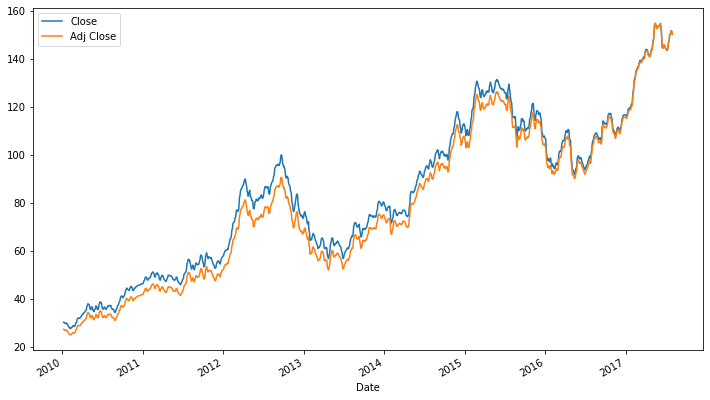

In [115]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();


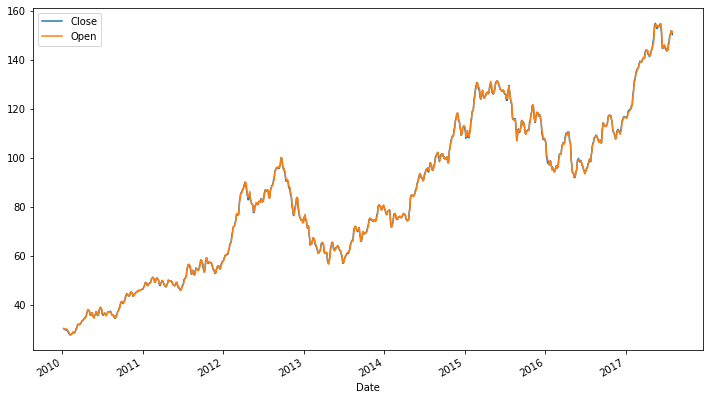

In [118]:
#MY EXAMPLE ####
aapl.rolling(5)[['Close', 'Open']].mean().plot();

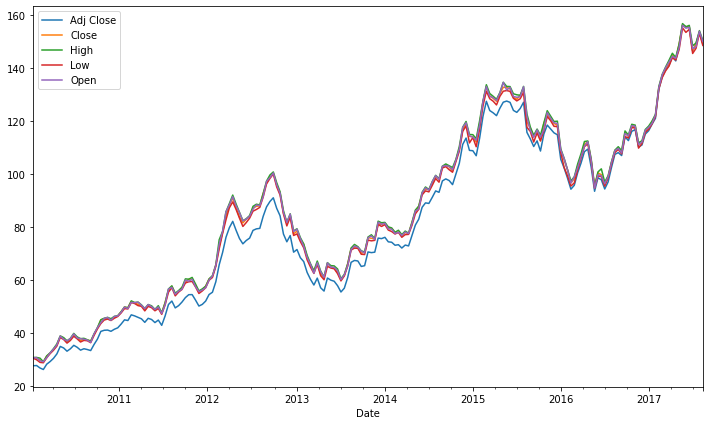

In [101]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

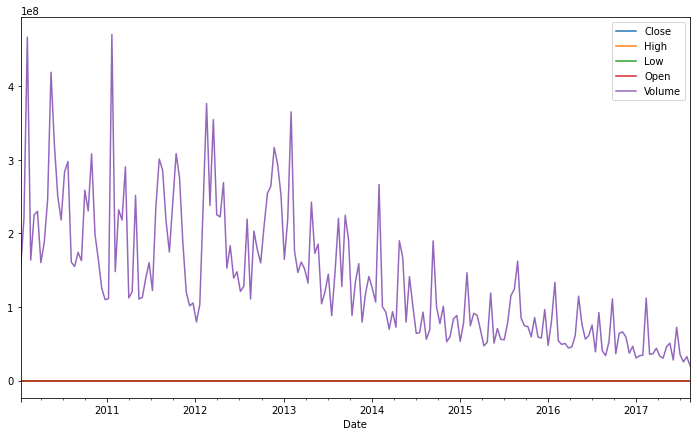

In [124]:
#MY EXAMPLE ####

aapl.drop('Adj Close', axis=1).resample('2W').max().plot();

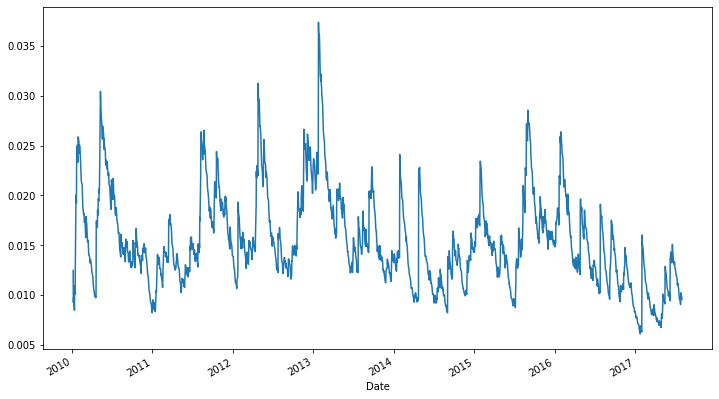

In [102]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

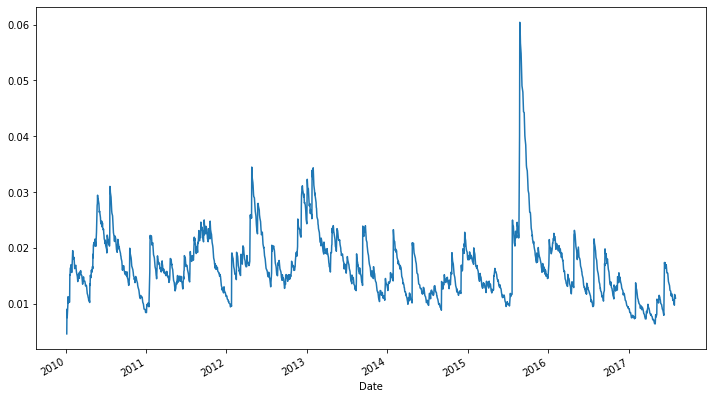

In [125]:
#MY EXAMPLE ####
aapl['Open'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [129]:
!pip install githubdl

In [130]:
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

2021-10-22 02:32:21,217 - root         - INFO     - Retrieving a list of files for directory: demos
2021-10-22 02:32:21,217 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos
2021-10-22 02:32:21,217 - root         - INFO     - Requesting file: demos at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos
2021-10-22 02:32:21,314 - root         - CRITICAL - Unable to retrieve list of files from response.
 Exception: 'str' object has no attribute 'get'
 Response: {'message': 'Bad credentials', 'documentation_url': 'https://docs.github.com/rest'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/githubdl/request_processing.py", line 21, in get_files_from_json
    files.update({item.get("name"): item.get("type")})
AttributeError: 'str' object has no attribute 'get'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

In [131]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [104]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

NameError: ignored

In [136]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

NameError: ignored

In [135]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [134]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

NameError: ignored

In [133]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

NameError: ignored

In [132]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

NameError: ignored

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!